Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

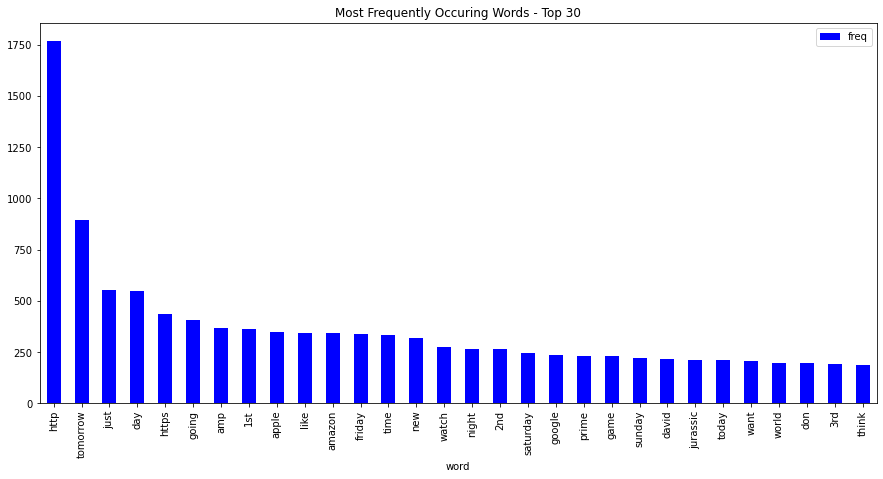

In [28]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

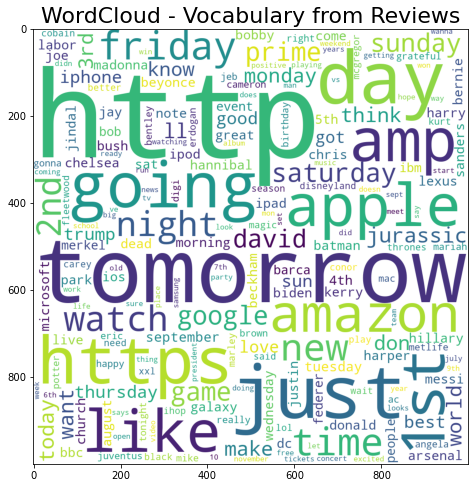

In [29]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [54]:
import os
import random
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.cm as cm
from matplotlib import rcParams
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.isri import ISRIStemmer
from collections import Counter 
import itertools
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from joblib import dump, load

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luche\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# data import 

In [117]:
import pandas as pd

df = pd.read_table('./data/twitter-2016train-A.txt' , usecols=[0,1,2], encoding='utf-8', names=['id','sentiment', 'tweet'])
#dataTest = pd.read_table('../input/semevalll/SemEval2017-test.txt', usecols=[1,2], encoding='utf-8', names=['sentiment', 'tweet'])                   
#combine = [dataTrain,dataTest]
df

,id,sentiment,tweet
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...
1,628976607420645377,negative,@Microsoft how about you make a system that do...
2,629023169169518592,negative,I may be ignorant on this issue but... should ...
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ..."
4,629186282179153920,neutral,If I make a game as a #windows10 Universal App...
...,...,...,...
5863,639855845958885376,positive,@Racalto_SK ok good to know. Punting at MetLif...
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...
5865,640196838260363269,neutral,what giants or niners fans would wanna go to t...
5866,640975710354567168,positive,Anybody want a ticket for tomorrow Colombia vs...


# add label

In [118]:
CATEGORY_INDEX = {
    "negative": -1,
    "neutral": 0,
    "positive": 1
}

"""import data """
raw_label = df['sentiment'].values.tolist()
rawlabel = []
for i in range(len(raw_label)):
    rawlabel.append(CATEGORY_INDEX[raw_label[i]])
rawlabel

[-1,
 -1,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 0,
 0,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 1,
 0,
 -1,
 -1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 -1,
 1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 1,
 -1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 -1,
 0

In [119]:
df['label'] = rawlabel
df

,id,sentiment,tweet,label
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...,-1
1,628976607420645377,negative,@Microsoft how about you make a system that do...,-1
2,629023169169518592,negative,I may be ignorant on this issue but... should ...,-1
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ...",-1
4,629186282179153920,neutral,If I make a game as a #windows10 Universal App...,0
...,...,...,...,...
5863,639855845958885376,positive,@Racalto_SK ok good to know. Punting at MetLif...,1
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...,0
5865,640196838260363269,neutral,what giants or niners fans would wanna go to t...,0
5866,640975710354567168,positive,Anybody want a ticket for tomorrow Colombia vs...,1


In [120]:
df_back = df.copy()
df_back

,id,sentiment,tweet,label
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...,-1
1,628976607420645377,negative,@Microsoft how about you make a system that do...,-1
2,629023169169518592,negative,I may be ignorant on this issue but... should ...,-1
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ...",-1
4,629186282179153920,neutral,If I make a game as a #windows10 Universal App...,0
...,...,...,...,...
5863,639855845958885376,positive,@Racalto_SK ok good to know. Punting at MetLif...,1
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...,0
5865,640196838260363269,neutral,what giants or niners fans would wanna go to t...,0
5866,640975710354567168,positive,Anybody want a ticket for tomorrow Colombia vs...,1


# data preprocessing

## 1 data cleansing 

In [121]:
df = df.dropna()

In [122]:
def clean_base(tweets, clean_object):
        #tweets.loc[:, "tweet"].replace(clean_object, "", inplace=True)
        tweets = re.sub(clean_object, ' ', tweets)
        return tweets

In [123]:
def remove_urls(tweets):
        return clean_base(tweets, re.compile(r"http.?://[^\s]+[\s]?"))

In [124]:
def remove_usernames(tweets):
        return clean_base(tweets, re.compile(r"@[^\s]+[\s]?"))

In [125]:
def remove_hashtags(tweets):  # it unrolls the hashtags to normal words
        for hashtag in map(lambda x: re.compile(re.escape(x)), [",", ":", "\"", "=", "&", ";", "%", "$",
                                                                     "@", "%", "^", "*", "(", ")", "{", "}",
                                                                     "[", "]", "|", "/", "\\", ">", "<", "-",
                                                                     "!", "?", ".", "'",
                                                                     "--", "---", "#"]):
            tweets = re.sub(hashtag, ' ', tweets)
        return tweets

In [126]:
def remove_numbers(tweets):
        return clean_base(tweets, re.compile(r"\s?[0-9]+\.?[0-9]*"))

In [127]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [128]:
##############################################

In [62]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
###############################################################

In [129]:
def processDocument(doc, stemmer): 

    #Replace @username with empty string
    doc = remove_usernames(doc)
    #Replace url with empty string
    doc = remove_urls(doc)

    
    #doc = re.sub(r'@[^\s]+', ' ', doc)
    #doc = re.sub(r'_', ' ', doc)
    
    
    doc = re.sub(r'\n', ' ', doc)
    doc = re.sub(r'\d', '', doc)
    #Convert www.* or https?://* to " "
    doc = re.sub('(www\.[^\s])',' ',doc)
    #Replace #word with word
    doc = re.sub(r'#([^\s]+)', r'\1', doc)
    
    # remove punctuations
    doc= remove_punctuations(doc)
    # normalize the tweet
    #doc= normalize_arabic(doc)
    
    #Replace numbers with empty string
    doc = remove_numbers(doc)
    #Replace @username with empty string
    doc = remove_hashtags(doc)
    # remove repeated letters
    #doc=remove_repeating_char(doc)
    
    #stemming
    doc = stemmer.stem(doc)
   
    return doc



stemmer = ISRIStemmer()
df["tweet"] = df['tweet'].apply(lambda x: processDocument(x, stemmer))
df

,id,sentiment,tweet,label
0,628949369883000832,negative,dear the newOoffice for Mac is great and all ...,-1
1,628976607420645377,negative,how about you make a system that doesnt eat m...,-1
2,629023169169518592,negative,I may be ignorant on this issue but should we ...,-1
3,629179223232479232,negative,Thanks to I just may be switching over to,-1
4,629186282179153920,neutral,If I make a game as a windows Universal App Wi...,0
...,...,...,...,...
5863,639855845958885376,positive,ok good to know Punting at MetLife in Decembe...,1
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...,0
5865,640196838260363269,neutral,what giants or niners fans would wanna go to t...,0
5866,640975710354567168,positive,Anybody want a ticket for tomorrow Colombia vs...,1


In [98]:
#df.to_csv('./data.csv')

In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luche\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [165]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\luche\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [ ]:
########################################trail 1#######################################################

In [177]:
data = []

# Separating our features (text) and our labels into two lists to smoothen our work
X = df['tweet'].tolist()
Y = df['label'].tolist()

# Building our data list, that is a list of tuples, where each tuple is a pair of the tokenized text
# and its corresponding label
for x, y in zip(X, Y):
    
    data.append((nltk.word_tokenize(x), y))
    
# Printing the CPU time and the first 5 elements of our 'data' list
#print('CPU Time:', time() - start_time)
data[:5]

[(['dear',
   'the',
   'newOoffice',
   'for',
   'Mac',
   'is',
   'great',
   'and',
   'all',
   'but',
   'no',
   'Lync',
   'update',
   'Cmon'],
  -1),
 (['how',
   'about',
   'you',
   'make',
   'a',
   'system',
   'that',
   'doesnt',
   'eat',
   'my',
   'friggin',
   'discs',
   'This',
   'is',
   'the',
   'nd',
   'time',
   'this',
   'has',
   'happened',
   'and',
   'I',
   'am',
   'so',
   'sick',
   'of',
   'it'],
  -1),
 (['I',
   'may',
   'be',
   'ignorant',
   'on',
   'this',
   'issue',
   'but',
   'should',
   'we',
   'celebrate',
   'parental',
   'leave',
   'changes',
   'Doesnt',
   'the',
   'gender',
   'divide',
   'suggest'],
  -1),
 (['Thanks', 'to', 'I', 'just', 'may', 'be', 'switching', 'over', 'to'], -1),
 (['If',
   'I',
   'make',
   'a',
   'game',
   'as',
   'a',
   'windows',
   'Universal',
   'App',
   'Will',
   'xboxone',
   'owners',
   'be',
   'able',
   'to',
   'download',
   'and',
   'play',
   'it',
   'in',
   'Novemb

In [183]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from time import time

In [179]:
pos_tag(data[0][0])

[('dear', 'IN'),
 ('the', 'DT'),
 ('newOoffice', 'NN'),
 ('for', 'IN'),
 ('Mac', 'NNP'),
 ('is', 'VBZ'),
 ('great', 'JJ'),
 ('and', 'CC'),
 ('all', 'DT'),
 ('but', 'CC'),
 ('no', 'DT'),
 ('Lync', 'NNP'),
 ('update', 'NN'),
 ('Cmon', 'NNP')]

In [180]:
def lemmatize_sentence(tag_data):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in tag_data:
        # First, we will convert the pos_tag output tags to a tag format that the WordNetLemmatizer can interpret
        # In general, if a tag starts with NN, the word is a noun and if it stars with VB, the word is a verb.
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word.lower(), pos))
    return lemmatized_sentence

# Previewing the WordNetLemmatizer() output
print(lemmatize_sentence(pos_tags[0][0]))

ValueError: too many values to unpack (expected 2)

In [182]:
STOP_WORDS = stopwords.words('english')
def lemmatize_sentence(tweet_tokens):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        # Eliminating the token if it is a link
        
        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token.lower(), pos)

        
        # Eliminating the token if its length is less than 3, if it is a punctuation or if it is a stopword
        if token not in string.punctuation and len(token) > 2 and token not in STOP_WORDS:
            cleaned_tokens.append(token)
            
    return cleaned_tokens
# Prevewing the remove_noise() output
print(lemmatize_sentence(data[0][0]))

['dear', 'newooffice', 'mac', 'great', 'lync', 'update', 'cmon']


In [185]:
start_time = time()

# As the Naive Bayesian classifier accepts inputs in a dict-like structure,
# we have to define a function that transforms our data into the required input structure
def list_to_dict(cleaned_tokens):
    return dict([token, True] for token in cleaned_tokens)

cleaned_tokens_list = []

# Removing noise from all the data
for tokens, label in data:
    cleaned_tokens_list.append((lemmatize_sentence(tokens), label))

print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

final_data = []

# Transforming the data to fit the input structure of the Naive Bayesian classifier
for tokens, label in cleaned_tokens_list:
    final_data.append((list_to_dict(tokens), label))
    
print('Data Prepared for model, CPU Time:', time() - start_time)

# Previewing our final (tokenized, cleaned and lemmatized) data list
final_data[:5]

Removed Noise, CPU Time: 7.004876136779785
Data Prepared for model, CPU Time: 0.013000965118408203


[({'dear': True,
   'newooffice': True,
   'mac': True,
   'great': True,
   'lync': True,
   'update': True,
   'cmon': True},
  -1),
 ({'make': True,
   'system': True,
   'doesnt': True,
   'eat': True,
   'friggin': True,
   'disc': True,
   'time': True,
   'happen': True,
   'sick': True},
  -1),
 ({'may': True,
   'ignorant': True,
   'issue': True,
   'celebrate': True,
   'parental': True,
   'leave': True,
   'change': True,
   'doesnt': True,
   'gender': True,
   'divide': True,
   'suggest': True},
  -1),
 ({'thanks': True, 'may': True, 'switch': True}, -1),
 ({'make': True,
   'game': True,
   'window': True,
   'universal': True,
   'app': True,
   'xboxone': True,
   'owner': True,
   'able': True,
   'download': True,
   'play': True,
   'november': True},
  0)]

Positive words


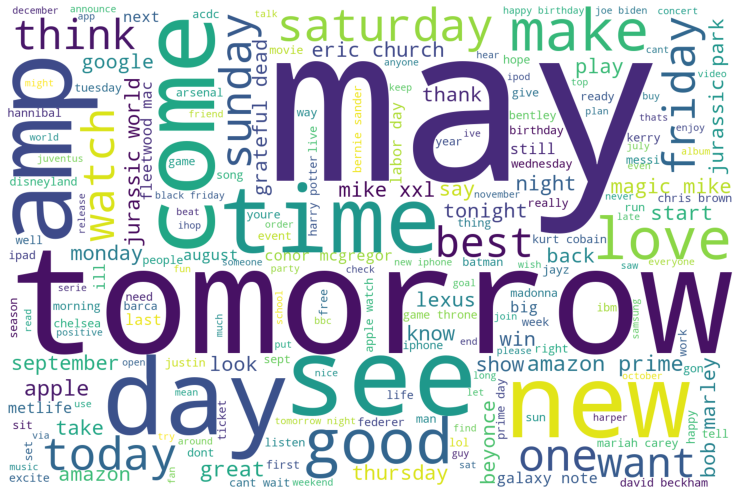

Negative words


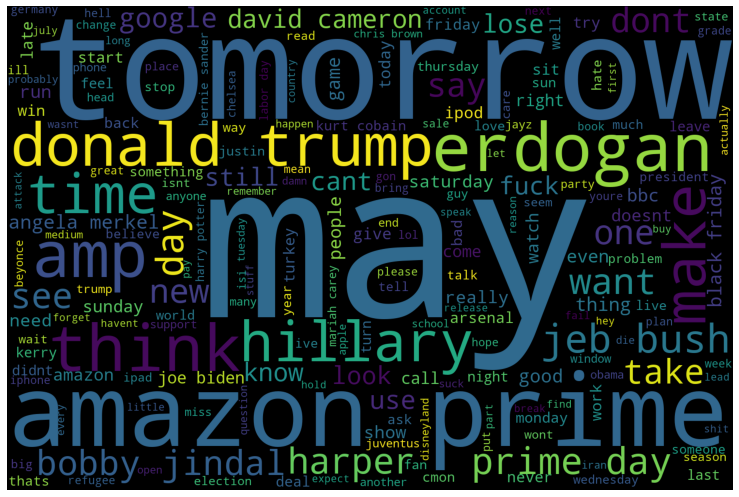

Neutral words


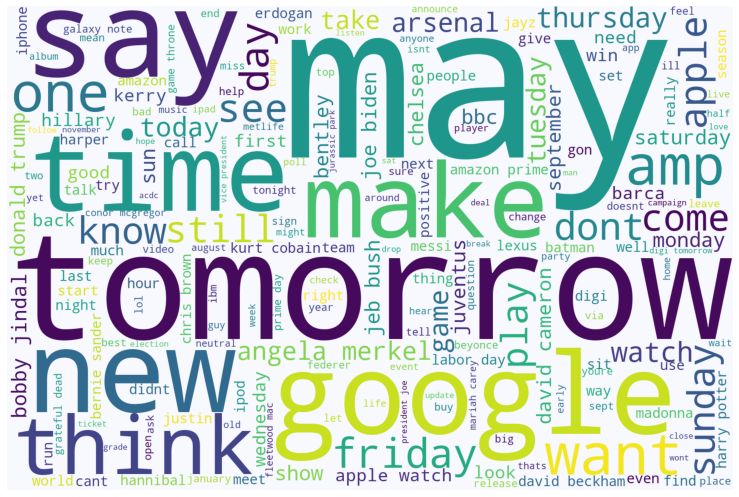

CPU Time: 8.515944719314575


In [197]:
start_time = time()

from wordcloud import WordCloud, STOPWORDS

positive_words = []
negative_words = []
neutral_words = []

# Separating out positive and negative words (i.e., words appearing in negative and positive tweets),
# in order to visualize each set of words seperately
for i in range(len(cleaned_tokens_list)):
    if cleaned_tokens_list[i][1] == 1:
        positive_words.extend(cleaned_tokens_list[i][0])
    elif cleaned_tokens_list[i][1] == -1:
        negative_words.extend(cleaned_tokens_list[i][0])
    elif cleaned_tokens_list[i][1] == 0:
        neutral_words.extend(cleaned_tokens_list[i][0])

# Defining our word cloud drawing function
def wordcloud_draw(data, color = 'black',title = 'positive'):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = color,
                          width = 1500,
                          height = 1000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig('./data/cloud_%s.jpg'%title)
    plt.show()
    
print("Positive words")
wordcloud_draw(positive_words, 'white',title = 'positive')
print("Negative words")
wordcloud_draw(negative_words,title = 'nagative')        
print("Neutral words")
wordcloud_draw(neutral_words,'ghostwhite',title = 'neutral') 

print('CPU Time:', time() - start_time)

In [201]:
# As our data is currently ordered by label, we have to shuffle it before splitting it
# .Random(140) randomizes our data with seed = 140. This guarantees the same shuffling for every execution of our code
# Feel free to alter this value or even omit it to have different outputs for each code execution
random.Random(22).shuffle(final_data)

# Here we decided to split our data as 90% train data and 10% test data
# Once again, feel free to alter this number and test the model accuracy
trim_index = int(len(final_data) * 0.9)

train_data = final_data[:trim_index]
test_data = final_data[trim_index:]

In [202]:
start_time = time()

from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

# Output the model accuracy on the train and test data
print('Accuracy on train data:', classify.accuracy(classifier, train_data))
print('Accuracy on test data:', classify.accuracy(classifier, test_data))

# Output the words that provide the most information about the sentiment of a tweet.
# These are words that are heavily present in one sentiment group and very rarely present in the other group.
print(classifier.show_most_informative_features(20))

print('\nCPU Time:', time() - start_time)

Accuracy on train data: 0.8112099981064192
Accuracy on test data: 0.5400340715502555
Most Informative Features
                 erdogan = True               -1 : 1      =     62.8 : 1.0
                    bush = True               -1 : 1      =     44.8 : 1.0
                     jeb = True               -1 : 1      =     41.8 : 1.0
                     isi = True               -1 : 1      =     27.0 : 1.0
                    care = True               -1 : 1      =     24.7 : 1.0
                    fail = True               -1 : 1      =     22.3 : 1.0
                    poll = True                0 : 1      =     20.6 : 1.0
                     wtf = True               -1 : 1      =     17.6 : 1.0
                erdogans = True               -1 : 1      =     15.3 : 1.0
                  refuse = True               -1 : 1      =     15.3 : 1.0
                    ruin = True               -1 : 1      =     15.3 : 1.0
                 suppose = True               -1 : 1      =     

In [200]:
from sklearn import metrics

# Storing all desired values in a list
y = [test_data[i][1] for i in range(len(test_data))]
# Storing all probabilities of having a positive sentiment in a list
probs = [classifier.prob_classify(test_data[i][0]).prob(1) for i in range(len(test_data))]

# Making sure both values a re equal
print(len(y), len(probs))

# performing the roc curve calculations
fpr, tpr, thresholds = metrics.roc_curve(y, probs)

# Printing the Area Under Curve (AUC) of the ROC curve (the closer to 1, the better)
auc = metrics.roc_auc_score(y, probs)
print('AUC: %.3f' % auc)

587 587


ValueError: multiclass format is not supported

In [ ]:
########################trail 1 ###############################################

In [130]:
def tokenize(tweets,tokenizer=nltk.word_tokenize):
            tweets["tweet"] = tokenizer(tweets["tweet"])
            tweets["tokenized_tweet"] = [] + tweets["tweet"]
            return tweets

df_token = df.apply(tokenize, axis=1)
df_token

,id,sentiment,tweet,label,tokenized_tweet
0,628949369883000832,negative,"[dear, the, newOoffice, for, Mac, is, great, a...",-1,"[dear, the, newOoffice, for, Mac, is, great, a..."
1,628976607420645377,negative,"[how, about, you, make, a, system, that, doesn...",-1,"[how, about, you, make, a, system, that, doesn..."
2,629023169169518592,negative,"[I, may, be, ignorant, on, this, issue, but, s...",-1,"[I, may, be, ignorant, on, this, issue, but, s..."
3,629179223232479232,negative,"[Thanks, to, I, just, may, be, switching, over...",-1,"[Thanks, to, I, just, may, be, switching, over..."
4,629186282179153920,neutral,"[If, I, make, a, game, as, a, windows, Univers...",0,"[If, I, make, a, game, as, a, windows, Univers..."
...,...,...,...,...,...
5863,639855845958885376,positive,"[ok, good, to, know, Punting, at, MetLife, in,...",1,"[ok, good, to, know, Punting, at, MetLife, in,..."
5864,639979760735662080,neutral,"[everyone, who, sat, around, me, at, metlife, ...",0,"[everyone, who, sat, around, me, at, metlife, ..."
5865,640196838260363269,neutral,"[what, giants, or, niners, fans, would, wan, n...",0,"[what, giants, or, niners, fans, would, wan, n..."
5866,640975710354567168,positive,"[Anybody, want, a, ticket, for, tomorrow, Colo...",1,"[Anybody, want, a, ticket, for, tomorrow, Colo..."


In [135]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('characters')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luche\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\luche\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


'character'

In [157]:
from collections import Counter

In [161]:
def stem1(tweets,stemmer=nltk.WordNetLemmatizer()):
    tweets["tweet"] = list(map(lambda str: stemmer.lemmatize(str.lower()), tweets["tweet"]))
    return tweets

df_stem = df_token.apply(stem1, axis=1)
df_stem

,id,sentiment,tweet,label,tokenized_tweet
0,628949369883000832,negative,"[dear, the, newooffice, for, mac, is, great, a...",-1,"[dear, the, newOoffice, for, Mac, is, great, a..."
1,628976607420645377,negative,"[how, about, you, make, a, system, that, doesn...",-1,"[how, about, you, make, a, system, that, doesn..."
2,629023169169518592,negative,"[i, may, be, ignorant, on, this, issue, but, s...",-1,"[I, may, be, ignorant, on, this, issue, but, s..."
3,629179223232479232,negative,"[thanks, to, i, just, may, be, switching, over...",-1,"[Thanks, to, I, just, may, be, switching, over..."
4,629186282179153920,neutral,"[if, i, make, a, game, a, a, window, universal...",0,"[If, I, make, a, game, as, a, windows, Univers..."
...,...,...,...,...,...
5863,639855845958885376,positive,"[ok, good, to, know, punting, at, metlife, in,...",1,"[ok, good, to, know, Punting, at, MetLife, in,..."
5864,639979760735662080,neutral,"[everyone, who, sat, around, me, at, metlife, ...",0,"[everyone, who, sat, around, me, at, metlife, ..."
5865,640196838260363269,neutral,"[what, giant, or, niner, fan, would, wan, na, ...",0,"[what, giants, or, niners, fans, would, wan, n..."
5866,640975710354567168,positive,"[anybody, want, a, ticket, for, tomorrow, colo...",1,"[Anybody, want, a, ticket, for, tomorrow, Colo..."


In [162]:
words = Counter()
for idx in df_stem.index:
    words.update(df_stem.loc[idx, "tweet"])

words.most_common(5)


[('the', 4745), ('to', 2807), ('a', 2093), ('i', 1811), ('on', 1738)]

In [159]:
def stem(tweets,stemmer=nltk.PorterStemmer()):
    tweets["tweet"] = list(map(lambda str: stemmer.stem(str.lower()), tweets["tweet"]))
    return tweets

df_stem = df_token.apply(stem, axis=1)

df_stem


,id,sentiment,tweet,label,tokenized_tweet
0,628949369883000832,negative,"[dear, the, newooffic, for, mac, is, great, an...",-1,"[dear, the, newOoffice, for, Mac, is, great, a..."
1,628976607420645377,negative,"[how, about, you, make, a, system, that, doesn...",-1,"[how, about, you, make, a, system, that, doesn..."
2,629023169169518592,negative,"[i, may, be, ignor, on, thi, issu, but, should...",-1,"[I, may, be, ignorant, on, this, issue, but, s..."
3,629179223232479232,negative,"[thank, to, i, just, may, be, switch, over, to]",-1,"[Thanks, to, I, just, may, be, switching, over..."
4,629186282179153920,neutral,"[if, i, make, a, game, as, a, window, univers,...",0,"[If, I, make, a, game, as, a, windows, Univers..."
...,...,...,...,...,...
5863,639855845958885376,positive,"[ok, good, to, know, punt, at, metlif, in, dec...",1,"[ok, good, to, know, Punting, at, MetLife, in,..."
5864,639979760735662080,neutral,"[everyon, who, sat, around, me, at, metlif, wa...",0,"[everyone, who, sat, around, me, at, metlife, ..."
5865,640196838260363269,neutral,"[what, giant, or, niner, fan, would, wan, na, ...",0,"[what, giants, or, niners, fans, would, wan, n..."
5866,640975710354567168,positive,"[anybodi, want, a, ticket, for, tomorrow, colo...",1,"[Anybody, want, a, ticket, for, tomorrow, Colo..."


In [ ]:
filtered_words =
[word for word in word_list if word not in stopwords.words('english')

In [37]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example_sent = "This is a sample sentence, showing off the stop words filtration."

stop_words = set(stopwords.words('english')) 
df["tweet"] = df['tweet'].apply(lambda x: word_tokenize(x))

In [ ]:
#tokenizer = RegexpTokenizer(r'\w+')
#clean_df["tweet"] = clean_df["tweet"].apply(tokenizer.tokenize)
# print(clean_df['text'].values[0])
#clean_df

In [153]:
stopwords_list = stopwords.words('english')
listToStr = ' '.join([str(elem) for elem in stopwords_list]) 
print(listToStr)


i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't


In [139]:
stopwords_list.append('may')
stopwords_list.append('th')
listToStr = ' '.join([str(elem) for elem in stopwords_list]) 
print(listToStr)

i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't may


In [154]:
whitelist = ["n't", "not","don","aren"]
for idx, stop_word in enumerate(stopwords_list):
    if stop_word not in whitelist:
        #del words[stop_word]
        stopwords_list.remove(stop_word)
listToStr = ' '.join([str(elem) for elem in stopwords_list]) 
print(listToStr)

me myself our ourselves you're you'll your yourself he his she her herself it's itself them theirs what who this that'll those is was be being has having does doing an and if because until of by with against into during after below from down out off under further once there where how any each more other such nor not own so too s can just don should now ll o ve ain aren couldn didn doesn hadn hasn haven isn ma mightn't mustn't needn't shan't shouldn't wasn't weren't won't wouldn't


In [147]:
df_stem["tweet"] = df_stem["tweet"].apply(lambda x: [item for item in x if item not in stopwords_list])
df_stem

,id,sentiment,tweet,label,tokenized_tweet
0,628949369883000832,negative,"[dear, newooffice, mac, great, lync, update, c...",-1,"[dear, the, newOoffice, for, Mac, is, great, a..."
1,628976607420645377,negative,"[make, system, doesnt, eat, friggin, disc, nd,...",-1,"[how, about, you, make, a, system, that, doesn..."
2,629023169169518592,negative,"[ignorant, issue, celebrate, parental, leave, ...",-1,"[I, may, be, ignorant, on, this, issue, but, s..."
3,629179223232479232,negative,"[thanks, switching]",-1,"[Thanks, to, I, just, may, be, switching, over..."
4,629186282179153920,neutral,"[make, game, window, universal, app, xboxone, ...",0,"[If, I, make, a, game, as, a, windows, Univers..."
...,...,...,...,...,...
5863,639855845958885376,positive,"[ok, good, know, punting, metlife, december, t...",1,"[ok, good, to, know, Punting, at, MetLife, in,..."
5864,639979760735662080,neutral,"[everyone, sat, around, metlife, wa, annoying,...",0,"[everyone, who, sat, around, me, at, metlife, ..."
5865,640196838260363269,neutral,"[giant, niner, fan, would, wan, na, go, sunday...",0,"[what, giants, or, niners, fans, would, wan, n..."
5866,640975710354567168,positive,"[anybody, want, ticket, tomorrow, colombia, v,...",1,"[Anybody, want, a, ticket, for, tomorrow, Colo..."


In [155]:
df_stem.to_csv('./df_stem.csv')

In [148]:
def countPropetries(df):
    all_words = [word for tokens in df["tweet"] for word in tokens]
    sentence_lengths = [len(tokens) for tokens in df["tweet"]]

    VOCAB = sorted(list(set(all_words)))

    print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
    print("Max sentence length is %s" % max(sentence_lengths))
    return all_words

positive_df = df_stem.loc[df_stem["label"] ==1]
neutral_df = df_stem.loc[df_stem["label"] == 0]
negative_df = df_stem.loc[df_stem["label"] == -1]

print("positive : ")
positive_words = countPropetries(positive_df)
print("\nneutral : ")
neutral_words = countPropetries(neutral_df)
print("\nnegative : ")
negative_words = countPropetries(negative_df)

positive : 
33630 words total, with a vocabulary size of 6810
Max sentence length is 543

neutral : 
22923 words total, with a vocabulary size of 5868
Max sentence length is 599

negative : 
9821 words total, with a vocabulary size of 3310
Max sentence length is 20


In [149]:
def plot(all_words, title):
    counted_words = Counter(all_words)

    words = []
    counts = []
    for letter, count in counted_words.most_common(25):
        words.append(letter)
        counts.append(count)

    colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 20, 10

    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)

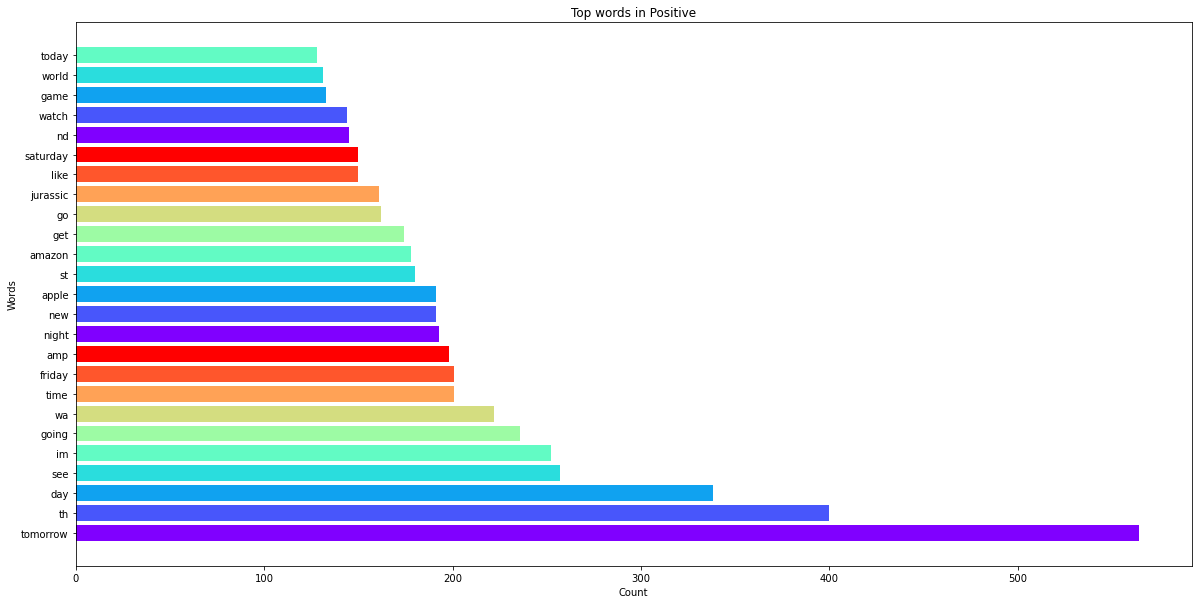

In [150]:
plot(positive_words, 'Top words in Positive')

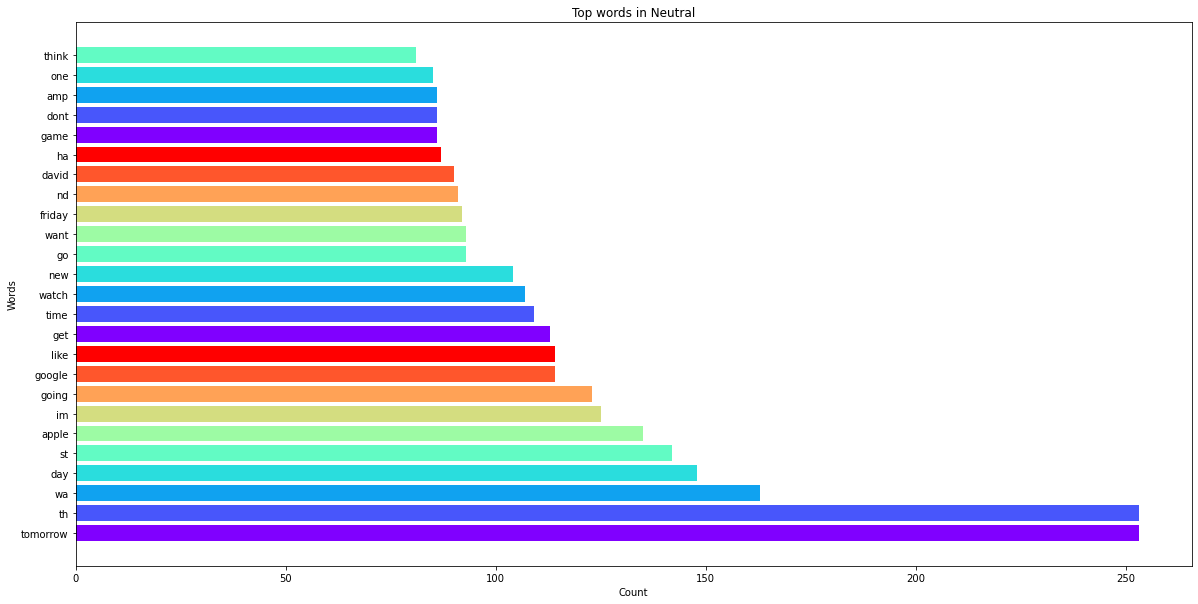

In [151]:
plot(neutral_words, 'Top words in Neutral')

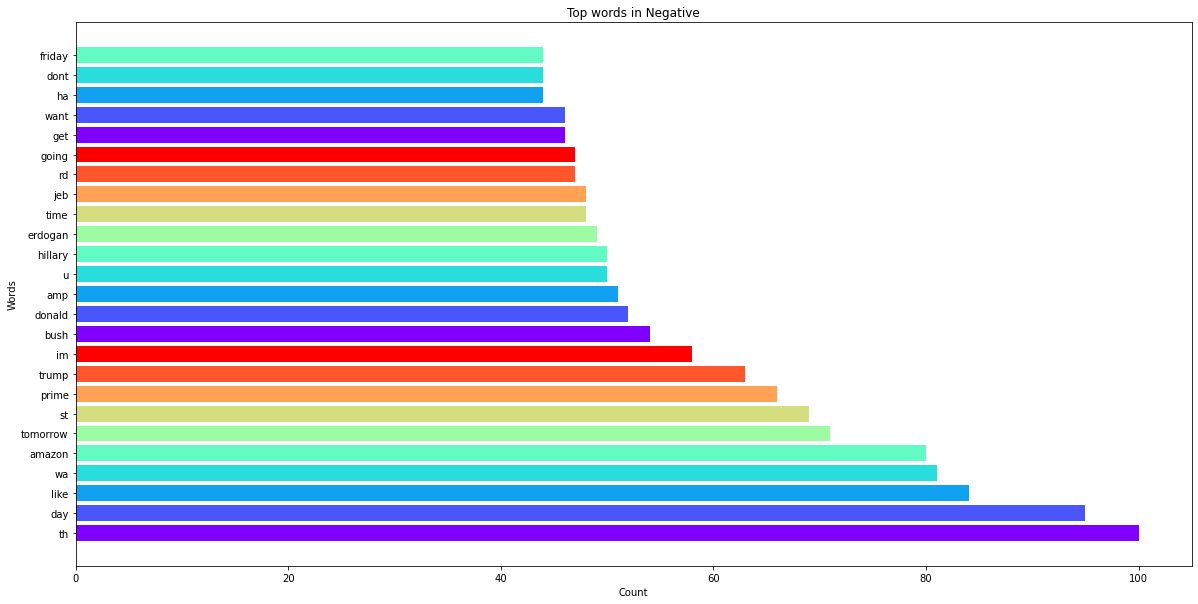

In [152]:
plot(negative_words, 'Top words in Negative')

In [47]:
y = df['label']
X = df['tweet']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)


In [48]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)

In [49]:
model = Pipeline([
                    ("tfidf", word_vectorizer), # convert words to numbers using tfidf
                    ("clf", SVC()) # model the text
])

# Fit the pipeline to the training data
model.fit(X_train.astype('str'), y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, strip_accents='unicode',
                                 sublinear_tf=True)),
                ('clf', SVC())])

In [50]:
dump(model, "svm_model.joblib")

['svm_model.joblib']

In [51]:
def calculate_results(y_true, y_pred):
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

y_pred = model.predict(X_test.astype('str'))
result = calculate_results(y_test, y_pred)
result

{'accuracy': 55.48738922972052,
 'precision': 0.46692436792149655,
 'recall': 0.5548738922972052,
 'f1': 0.4891173700700606}

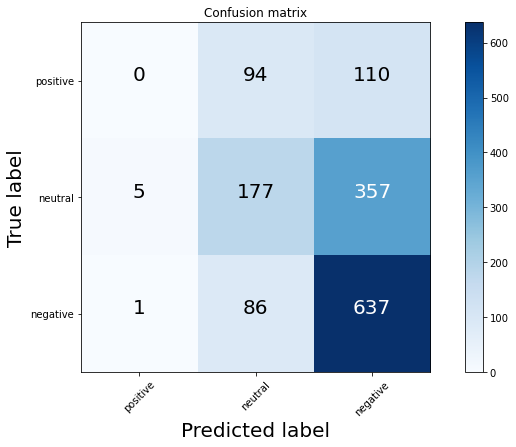

In [52]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    fig = plt.figure(figsize = (10,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 fontsize=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['positive', 'neutral', 'negative'])